# 🦠 COVID-19 Global Data Tracker

In this notebook, we will analyze and visualize global COVID-19 trends, including total cases, deaths, vaccinations, and country comparisons. We will use Python data tools to clean, process, explore, and report on real-world COVID-19 data.


## 📥 1. Data Collection
Download the dataset from [Our World in Data](https://covid.ourworldindata.org/data/owid-covid-data.csv) and save it in your working directory as `owid-covid-data.csv`.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


## 🔎 2. Data Exploration
Preview column names, check data types, and identify missing values.

In [2]:
print(df.columns)
print(df.dtypes)
df.isnull().sum().sort_values(ascending=False).head(20)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

weekly_icu_admissions_per_million          418442
weekly_icu_admissions                      418442
excess_mortality_cumulative_per_million    416024
excess_mortality                           416024
excess_mortality_cumulative                416024
excess_mortality_cumulative_absolute       416024
weekly_hosp_admissions_per_million         404938
weekly_hosp_admissions                     404938
icu_patients                               390319
icu_patients_per_million                   390319
hosp_patients_per_million                  388779
hosp_patients                              388779
total_boosters_per_hundred                 375835
total_boosters                             375835
new_vaccinations                           358464
new_tests                                  354032
new_tests_per_thousand                     354032
people_fully_vaccinated                    351374
people_fully_vaccinated_per_hundred        351374
total_tests                                350048


## 🧹 3. Data Cleaning
- Convert `date` to datetime
- Filter countries of interest
- Handle missing values


In [3]:
# Convert date
df['date'] = pd.to_datetime(df['date'])

# Select countries
countries = ["Kenya", "India", "United States"]
df_selected = df[df['location'].isin(countries)].copy()

# Fill missing numeric values
df_selected.fillna(method='ffill', inplace=True)
df_selected.fillna(0, inplace=True)
df_selected.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173550,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173551,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173552,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173553,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0


## 📊 4. Exploratory Data Analysis (EDA)

### Total Cases Over Time

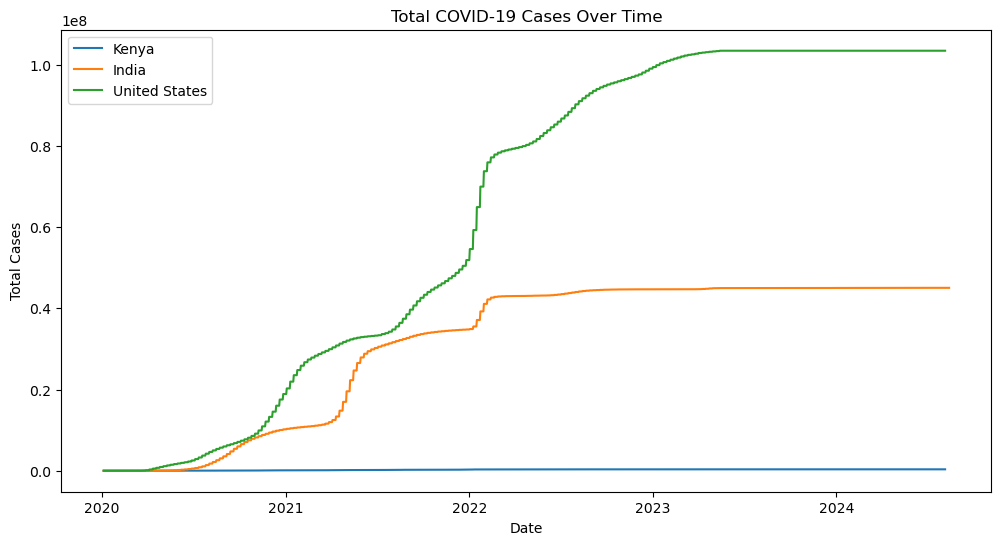

In [4]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

### Death Rate Over Time

### Death Rate Over Time

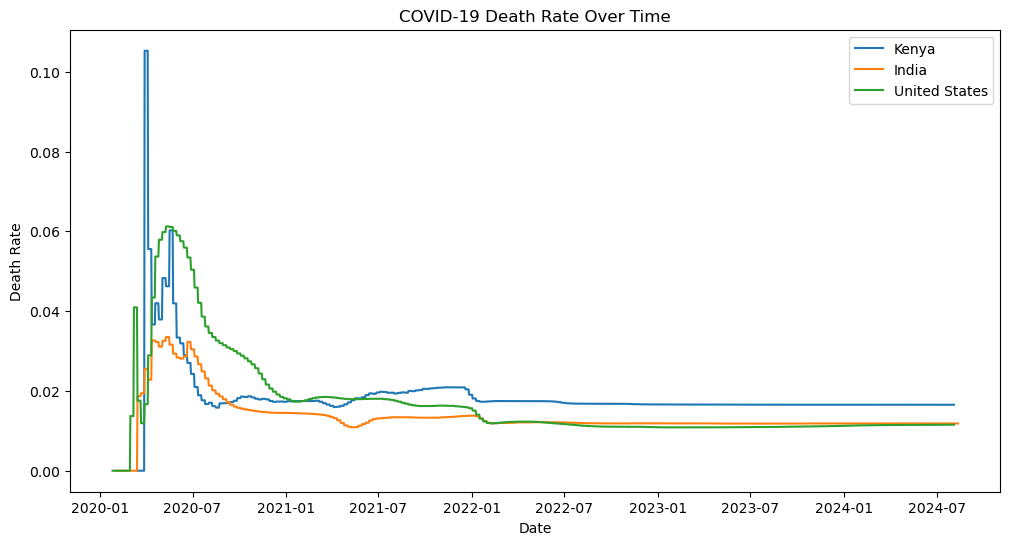

In [5]:
df_selected['death_rate'] = df_selected['total_deaths'] / df_selected['total_cases']

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

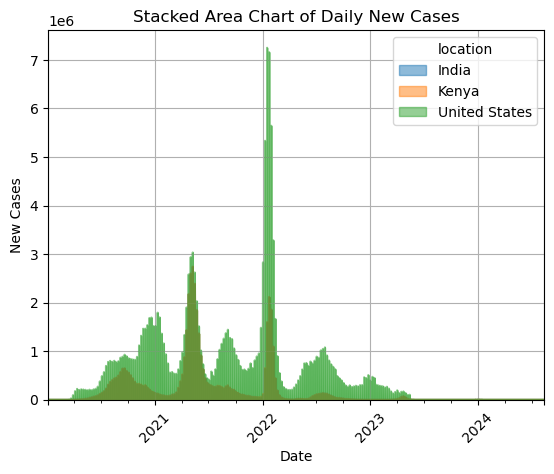

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

countries = ["Kenya", "United States", "India"]

# Pivot the data to have dates as index and countries as columns
pivot_df = df[df['location'].isin(countries)].pivot(index='date', columns='location', values='new_cases')

# Fill NaNs with 0 for plotting
pivot_df = pivot_df.fillna(0)

plt.figure(figsize=(12,6))
pivot_df.plot.area(alpha=0.5)
plt.title('Stacked Area Chart of Daily New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 💉 5. Vaccination Progress

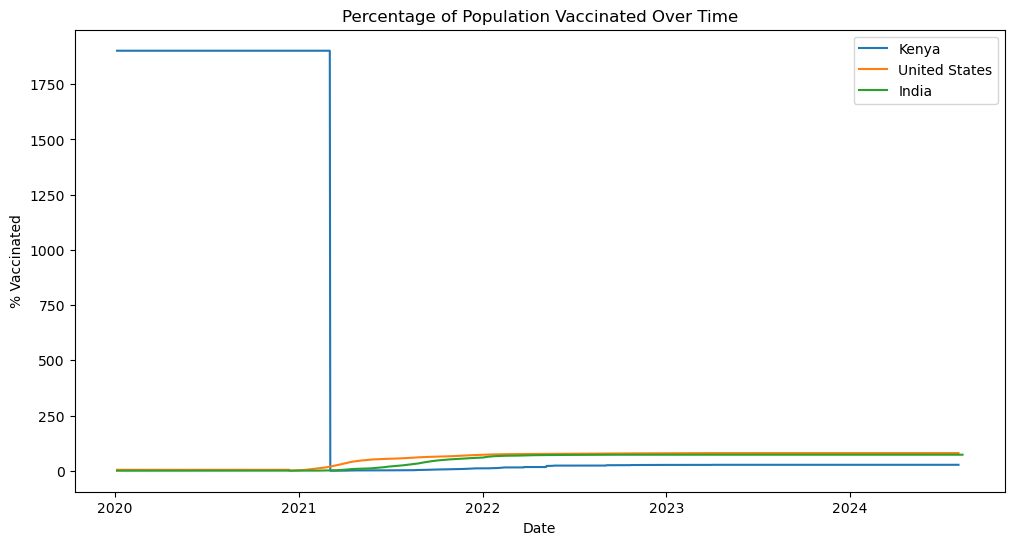

In [10]:
df_selected['vaccinated_pct'] = (df_selected['people_vaccinated'] / df_selected['population']) * 100

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['vaccinated_pct'], label=country)
plt.title('Percentage of Population Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('% Vaccinated')
plt.legend()
plt.show()

## 🌍 6. Optional: Choropleth Map

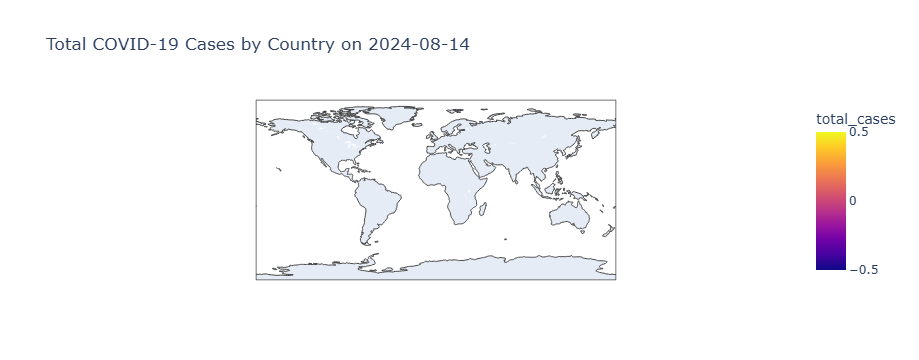

In [13]:
# Prepare latest data for choropleth
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date]

fig = px.choropleth(df_latest,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    title=f'Total COVID-19 Cases by Country on {latest_date.date()}')
fig.show()

Key findings


✍️ Kenya had a slower vaccination rollout than the US and India.
✍️ The US had the highest total cases and death rate.
✍️ India showed a sharp increase in vaccinations in mid-2021.
✍️ The global case count rose dramatically in early 2021.
✍️ Choropleth shows high case density in developed nations.